In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

## Series

In [2]:
obj = pd.Series([4, 7, -5, 3])
obj
# 第一列为索引，第二列为值

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
obj.values

array([ 4,  7, -5,  3])

In [4]:
obj.value_counts()

 4    1
 7    1
-5    1
 3    1
dtype: int64

In [5]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
# 创建时指定索引
obj1 = pd.Series([4, 7, -5, 3], index=['a', 'b', 'c', 'd'])

In [7]:
obj1

a    4
b    7
c   -5
d    3
dtype: int64

In [8]:
# 使用标签对数据进行索引
obj1['a']

4

In [9]:
obj1[['b', 'd']]

b    7
d    3
dtype: int64

In [10]:
# 重新赋值
obj1['b'] = 99

In [11]:
obj1

a     4
b    99
c    -5
d     3
dtype: int64

In [12]:
obj1[obj1 > 0]

a     4
b    99
d     3
dtype: int64

In [13]:
obj1 * 2

a      8
b    198
c    -10
d      6
dtype: int64

In [14]:
np.exp(obj1)

a    5.459815e+01
b    9.889030e+42
c    6.737947e-03
d    2.008554e+01
dtype: float64

In [15]:
# 可以认为Series当作长度固定有序的字典
'b' in obj1

True

In [16]:
'e' in obj1

False

In [17]:
# 可以使用字典来生成一个Series
dict1 = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj2 = pd.Series(dict1)

In [18]:
obj2

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [19]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj3 = pd.Series(dict1, index=states)

In [20]:
obj3

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [21]:
pd.isnull(obj3)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [22]:
pd.notnull(obj3)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [23]:
# 数学操作中，会自动对其索引，与数据库的join操作非常类似
obj2 + obj3

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [24]:
# Series自身属性
obj3.name = 'population'
obj3.index.name = 'state'

In [25]:
obj3

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [26]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [27]:
# 通过按位索引的方式改变索引的值
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [28]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

In [29]:
pd.Series(['a', 'b', 'c', 'd'], index=[1, 2, 3, 4])

1    a
2    b
3    c
4    d
dtype: object

## Dataframe

In [30]:
# 可以使用列表或者字典来创建DataFrame
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2001, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data)

In [31]:
df

,state,year,pop
0,Ohio,2001,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [32]:
# head方法只会挑选出前5行
df.head()

,state,year,pop
0,Ohio,2001,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [33]:
# 如果指定的列不在原数据中，对应指定的列会显示为NaN
df2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five', 'six'])

In [34]:
df2

,year,state,pop,debt
one,2001,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [35]:
# 取出指定的列
df2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [36]:
# df2['state1'] 如果列不存在则会跑出错误

In [37]:
# df2.state1 # 同上

In [38]:
# 行也可以通过位置或特殊属性loc进行选取
df2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [39]:
# 列的引用是可以修改的，设置为标量值
df2.debt = 16.5

In [40]:
df2

,year,state,pop,debt
one,2001,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [41]:
# 或者设置为值数组
df2.debt = np.arange(6)

In [42]:
df2

,year,state,pop,debt
one,2001,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


In [43]:
# 当将Series赋值给DataFrame时，会按照索引重新排列，并在空缺的地方填充NaN
# 如果对应的列不存在，会新建一个列
series = pd.Series([1.2, -1.5, 1.7], index=['three', 'one', 'four'])
df2.debt = series
df2

,year,state,pop,debt
one,2001,Ohio,1.5,-1.5
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,1.2
four,2001,Nevada,2.4,1.7
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [44]:
df2['eastern'] = df2.state == 'Ohio'
#不能使用df2.eastern创建新的列

In [45]:
df2

,year,state,pop,debt,eastern
one,2001,Ohio,1.5,-1.5,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,1.2,True
four,2001,Nevada,2.4,1.7,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


In [46]:
# 字典嵌套的字典
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
df3 = pd.DataFrame(pop)

In [47]:
df3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [48]:
df3.index.name = 'year'
df3.columns.name = 'state'

In [49]:
df3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [50]:
# 转置
df3.T

year,2001,2002,2000
state,,,
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [51]:
df3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [52]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [53]:
obj

a    0
b    1
c    2
dtype: int64

In [54]:
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [55]:
index[1:]

Index(['b', 'c'], dtype='object')

In [56]:
# 索引对象是不可变的，无法修改
#index[1]='e'
# TypeError: Index does not support mutable operations

In [57]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [58]:
obj4 = pd.Series([1.5, -2.5, 0], index=labels)
obj4

0    1.5
1   -2.5
2    0.0
dtype: float64

In [59]:
df3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [60]:
df3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [61]:
'Ohio' in df3.columns

True

In [62]:
2003 in df3.index

False

In [63]:
# pandas索引对象可以包含重复标签
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

In [64]:
dup_labels.append(pd.Index(['bar']))

Index(['foo', 'foo', 'bar', 'bar', 'bar'], dtype='object')

In [65]:
df3.index

Int64Index([2001, 2002, 2000], dtype='int64', name='year')

In [66]:
index1 = pd.Index(['cat', 'dog', 'pig', 'tiger'])
index2 = pd.Index(['cat', 'tiger'])
# 两个索引的差集
index1.difference(index2)

Index(['dog', 'pig'], dtype='object')

In [67]:
# 两个索引的交集
index1.intersection(index2)

Index(['cat', 'tiger'], dtype='object')

In [68]:
index1.delete(1)  # 删除其中的一个索引，传入的参数时索引的位置

Index(['cat', 'pig', 'tiger'], dtype='object')

In [69]:
index1.insert(1, 'horse')

Index(['cat', 'horse', 'dog', 'pig', 'tiger'], dtype='object')

In [70]:
# 重建索引
obj = pd.Series([4.5, 7.5, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.5
a   -5.3
c    3.6
dtype: float64

In [71]:
#会按照新的索引进行排序
obj.reindex(['a', 'b', 'c', 'd'])

a   -5.3
b    7.5
c    3.6
d    4.5
dtype: float64

In [72]:
# 如果新的索引没有对应的值，则填充NaN
obj.reindex(['a', 'b', 'c', 'd', 'e'])

a   -5.3
b    7.5
c    3.6
d    4.5
e    NaN
dtype: float64

In [73]:
# 部分索引
obj.reindex(['a', 'b'])

a   -5.3
b    7.5
dtype: float64

In [74]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [75]:
# 填充空置时，使用ffill时向前填充
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [76]:
frame = pd.DataFrame(np.arange(16).reshape(4, 4),
                     index=['a', 'b', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California', 'New York'])
frame

,Ohio,Texas,California,New York
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [77]:
# 重建索引
frame.reindex(['a', 'b', 'c', 'd'])

,Ohio,Texas,California,New York
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [78]:
state = ['Texas', 'Utah', 'California']
# 对于重建后的索引，如果原数据不包含新的索引，就会填充NaN
frame.reindex(columns=state)

,Texas,Utah,California
a,1,NaN,2
b,5,NaN,6
c,9,NaN,10
d,13,NaN,14


In [79]:
frame

,Ohio,Texas,California,New York
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [80]:
state = ['Texas', 'California']
# 使用loc必须保证给出的索引在DF中存在
frame.loc[['a', 'b', 'c', 'd'], state]

,Texas,California
a,1,2
b,5,6
c,9,10
d,13,14


In [81]:
obj = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [82]:
# 轴上删除条目
obj.drop('c')

a    0
b    1
d    3
e    4
dtype: int64

In [83]:
# 删除两个条目
obj.drop(['a', 'b'])

c    2
d    3
e    4
dtype: int64

In [84]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index=['Ohio', 'California', 'New York', 'Texas'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
California,4,5,6,7
New York,8,9,10,11
Texas,12,13,14,15


In [85]:
# 删除行
data.drop('Ohio')

,one,two,three,four
California,4,5,6,7
New York,8,9,10,11
Texas,12,13,14,15


In [86]:
# 删除列
data.drop(columns='one')

,two,three,four
Ohio,1,2,3
California,5,6,7
New York,9,10,11
Texas,13,14,15


In [87]:
data.drop(['one', 'two'], axis='columns')

,three,four
Ohio,2,3
California,6,7
New York,10,11
Texas,14,15


In [88]:
# drop操作不会修改原有Series或DataFrame的结构
# 如果直接操作原对象，则添加inplace
data.drop('Ohio', inplace=True)
data

,one,two,three,four
California,4,5,6,7
New York,8,9,10,11
Texas,12,13,14,15


In [89]:
data.index
# Ohio已经从原DataFrame中被删除

Index(['California', 'New York', 'Texas'], dtype='object')

In [90]:
obj = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
obj

a    0
b    1
c    2
d    3
dtype: int64

In [91]:
obj[1:3]

b    1
c    2
dtype: int64

In [92]:
obj['b']

1

In [93]:
# 直接使用索引值进行切片，是包含尾部的
obj['b':'c']

b    1
c    2
dtype: int64

In [94]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index=['Ohio', 'California', 'NewYork', 'Washington'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
California,4,5,6,7
NewYork,8,9,10,11
Washington,12,13,14,15


In [95]:
# 取出one这一列
data['one']

Ohio           0
California     4
NewYork        8
Washington    12
Name: one, dtype: int64

In [96]:
data[['one', 'three']]

,one,three
Ohio,0,2
California,4,6
NewYork,8,10
Washington,12,14


In [97]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
California,4,5,6,7


In [98]:
data[data['three'] > 5]

,one,two,three,four
California,4,5,6,7
NewYork,8,9,10,11
Washington,12,13,14,15


In [99]:
# 布尔值可以通过与标量值比较产生
data < 5

,one,two,three,four
Ohio,True,True,True,True
California,True,False,False,False
NewYork,False,False,False,False
Washington,False,False,False,False


### loc和iloc选择数据

In [100]:
# loc使用轴标签
# iloc使用整数标签
data.loc['California', ['one', 'two']]

one    4
two    5
Name: California, dtype: int64

In [101]:
data.loc[:'California', 'three']

Ohio          2
California    6
Name: three, dtype: int64

In [102]:
# 传入1,2，返回DataFrame的第1行
data.iloc[[1, 2]]

,one,two,three,four
California,4,5,6,7
NewYork,8,9,10,11


In [103]:
# 传入第二个参数，返回指定列的内容
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: NewYork, dtype: int64

In [104]:
ser = pd.Series(np.arange(3.))
ser
#ser[-1] 会产生歧义

0    0.0
1    1.0
2    2.0
dtype: float64

In [105]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2

a    0.0
b    1.0
c    2.0
dtype: float64

In [106]:
ser2[-1]  # 使用给数字的索引则不会产生歧义

2.0

In [107]:
ser[:1]

0    0.0
dtype: float64

In [108]:
ser.iloc[:1]

0    0.0
dtype: float64

In [109]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

### 算数和数据对齐

In [111]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s1 + s2  # 相当于取并集

a    5.2
b    NaN
c    7.0
d    NaN
e    NaN
f    NaN
g    NaN
dtype: float64

In [117]:
df1 = pd.DataFrame(np.arange(9.).reshape(3, 3),
                   index=['Ohio', 'Texas', 'California'],
                   columns=list('abc'))
df2 = pd.DataFrame(np.arange(12.).reshape(4, 3),
                   index=['Utah', 'Ohio', 'California', 'Texas'],
                   columns=list('bcd'))
df1

,a,b,c
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
California,6.0,7.0,8.0


In [118]:
df2

,b,c,d
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
California,6.0,7.0,8.0
Texas,9.0,10.0,11.0


In [119]:
df1 + df2  # 计算过后会自动对齐索引

,a,b,c,d
California,NaN,13.0,15.0,NaN
Ohio,NaN,4.0,6.0,NaN
Texas,NaN,13.0,15.0,NaN
Utah,NaN,NaN,NaN,NaN


In [120]:
df1 - df2

,a,b,c,d
California,NaN,1.0,1.0,NaN
Ohio,NaN,-2.0,-2.0,NaN
Texas,NaN,-5.0,-5.0,NaN
Utah,NaN,NaN,NaN,NaN


In [122]:
df1 = pd.DataFrame(np.arange(12.).reshape(3, 4),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape(4, 5),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [123]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [124]:
df1.add(df2, fill_value=0)  # 使用0来填充NaN

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [125]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [126]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [127]:
df1.div(1)  # 除以1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [128]:
df1.rdiv(1)  # 用1除以df1中的值，带上r就是参数反转

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [129]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### DataFrame与Series之间的操作

In [135]:
arr = np.arange(12).reshape(3, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [136]:
arr[0]

array([0, 1, 2, 3])

In [152]:
arr - arr[0]  # 每一行都减去第0列，这就是广播机制

array([[0, 0, 0, 0],
       [4, 4, 4, 4],
       [8, 8, 8, 8]])

In [153]:
frame = pd.DataFrame(np.arange(12).reshape(4, 3),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [154]:
series = frame.iloc[0]

In [155]:
series

b    0
d    1
e    2
Name: Utah, dtype: int64

In [156]:
type(series)

pandas.core.series.Series

In [157]:
frame - series

,b,d,e
Utah,0,0,0
Ohio,3,3,3
Texas,6,6,6
Oregon,9,9,9


In [158]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [159]:
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [160]:
# 如果一个索引值不在DataFrame的列中，也不在Series的索引中，则对象会重建索引并形成联合索引
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [162]:
series3 = frame['d']
series3

Utah       1
Ohio       4
Texas      7
Oregon    10
Name: d, dtype: int64

In [164]:
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [165]:
frame.sub(series3, axis=0)

,b,d,e
Utah,-1,0,1
Ohio,-1,0,1
Texas,-1,0,1
Oregon,-1,0,1


In [166]:
# 在列上就行广播，减去d列的值
frame.sub(series3, axis=0)

,b,d,e
Utah,-1,0,1
Ohio,-1,0,1
Texas,-1,0,1
Oregon,-1,0,1


In [171]:
frame = pd.DataFrame(np.random.randn(4, 3),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'],
                     columns=list('bde'))
frame

,b,d,e
Utah,-0.424131,1.526750,0.210062
Ohio,0.174344,-1.650725,0.323626
Texas,-0.884779,-1.510669,-0.624540
Oregon,0.778284,-0.402216,-0.626976


In [172]:
# numpy的通用函数，对pandas也有效
np.abs(frame)

,b,d,e
Utah,0.424131,1.526750,0.210062
Ohio,0.174344,1.650725,0.323626
Texas,0.884779,1.510669,0.624540
Oregon,0.778284,0.402216,0.626976


In [173]:
# f函数可以计算Series的最大值和最小值的差，会被frame中的每一列调用一次，结果是一个以frame的列作为索引的Series
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.663063
d    3.177476
e    0.950601
dtype: float64

In [176]:
# 在每行上调用一次
frame.apply(f, axis='columns')

Utah      1.950881
Ohio      1.974351
Texas     0.886129
Oregon    1.405260
dtype: float64

In [177]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [178]:
frame.apply(f)

,b,d,e
min,-0.884779,-1.650725,-0.626976
max,0.778284,1.526750,0.323626


In [181]:
# 使用applymap逐元素计算，保留两位小数
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.42,1.53,0.21
Ohio,0.17,-1.65,0.32
Texas,-0.88,-1.51,-0.62
Oregon,0.78,-0.40,-0.63


In [182]:
# 与DataFrame相比Series有map方法
frame['e'].map(format)

Utah       0.21
Ohio       0.32
Texas     -0.62
Oregon    -0.63
Name: e, dtype: object

### 排序和排名

In [183]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [185]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [187]:
frame = pd.DataFrame(np.arange(8).reshape(2, 4),
                     index=['three', 'one'],
                     columns=list('dabc'))

In [188]:
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [189]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [190]:
frame.sort_index(axis=0)

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [191]:
# 默认升序排列，可以执行排序类型
frame.sort_index(axis=0, ascending=False)

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [194]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()
# NaN默认会放置在底部

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [195]:
frame = pd.DataFrame({'b': [4, 7, -3, -2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,-2,1


In [198]:
frame.sort_values(by=['b'])

,b,a
2,-3,0
3,-2,1
0,4,0
1,7,1


In [199]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,-2,1
1,7,1


In [200]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [201]:
# 实现排名，默认情况下，rank通过平均排名分配到每个组来打破平级关系
# 就是下面有两个相同的数字7，则排名取平均数(6+7)/2=6.5
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [202]:
# 可以通过先排序打破评级关系
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [203]:
# 根据值在数据中出现的次序分配排名
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [204]:
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [205]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1], 'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [206]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### 含有重复标签的轴索引

In [207]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [208]:
obj.index.is_unique

False

In [209]:
obj['a']

a    0
a    1
dtype: int64

In [210]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,0.259675,-1.103094,1.277788
a,0.130609,-0.596088,-1.056608
b,-0.302675,-0.249615,1.450280
b,-0.875260,-0.043289,-0.248724


In [212]:
df.loc['a']

,0,1,2
a,0.259675,-1.103094,1.277788
a,0.130609,-0.596088,-1.056608


In [213]:
df.iloc[:2]

,0,1,2
a,0.259675,-1.103094,1.277788
a,0.130609,-0.596088,-1.056608


In [214]:
df.loc['b']

,0,1,2
b,-0.302675,-0.249615,1.450280
b,-0.875260,-0.043289,-0.248724


## 描述性统计的概述与计算

In [216]:
df = pd.DataFrame([[1.4, np.nan],
                   [7.1, -4.5],
                   [np.nan, np.nan],
                   [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [217]:
# 调用sum方法，会返回一个包含列上加和的Series
df.sum()

one    9.25
two   -5.80
dtype: float64

In [218]:
# 传入axis='columns'，可以执行统一行上列的值的相加
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [219]:
# 数值计算时，默认时跳过NaN，可以在上skipna=False来实现不排除NaN
df.sum(axis='columns', skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [222]:
# 取出最大值所在的索引
df.idxmax()

one    d
two    b
dtype: object

In [223]:
df.idxmin()

one    d
two    b
dtype: object

In [224]:
# 累计值
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [225]:
# 汇总统计
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


### 相关性与方差

In [226]:
import pandas_datareader.data as web

In [227]:
# 从雅虎财经获取4家公司股票信息
all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

In [230]:
type(all_data)

dict

In [233]:
all_data

{'AAPL':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2017-05-01   36.799999   36.240002   36.275002   36.645000  134411600.0   
 2017-05-02   37.022499   36.709999   36.884998   36.877499  181408800.0   
 2017-05-03   36.872501   36.067501   36.397499   36.764999  182788000.0   
 2017-05-04   36.785000   36.452499   36.630001   36.632500   93487600.0   
 2017-05-05   37.244999   36.689999   36.689999   37.240002  109310800.0   
 ...                ...         ...         ...         ...          ...   
 2022-04-25  163.169998  158.460007  161.119995  162.880005   96046400.0   
 2022-04-26  162.339996  156.720001  162.250000  156.800003   95623200.0   
 2022-04-27  159.789993  155.380005  155.910004  156.570007   88063200.0   
 2022-04-28  164.520004  158.929993  159.250000  163.639999  130216800.0   
 2022-04-29  166.199997  157.250000  161.839996  157.649994  131587100.0   
 
  

In [258]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
price.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2022-04-25,162.880005,139.100006,280.720001,2465.000000
2022-04-26,156.800003,136.190002,270.220001,2390.120117
2022-04-27,156.570007,135.059998,283.220001,2300.409912
2022-04-28,163.639999,135.740005,289.630005,2388.229980
2022-04-29,157.649994,132.210007,277.519989,2299.330078


In [238]:
volume = pd.DataFrame({ticker: data['Volume'] for ticker, data in all_data.items()})
volume

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-05-01,134411600.0,5162324.0,31954400.0,2116000
2017-05-02,181408800.0,3355777.0,23906100.0,1587200
2017-05-03,182788000.0,4176992.0,28928000.0,1499500
2017-05-04,93487600.0,4477508.0,21749400.0,1422100
2017-05-05,109310800.0,13097280.0,19128800.0,1911300
...,...,...,...,...
2022-04-25,96046400.0,5748300.0,35678900.0,1726100
2022-04-26,95623200.0,4956200.0,46518400.0,2469700
2022-04-27,88063200.0,4369100.0,63477700.0,3111900


In [241]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2022-04-25,0.006737,0.006148,0.024413,0.030398
2022-04-26,-0.037328,-0.020920,-0.037404,-0.030377
2022-04-27,-0.001467,-0.008297,0.048109,-0.037534
2022-04-28,0.045155,0.005035,0.022633,0.038176
2022-04-29,-0.036605,-0.026006,-0.041812,-0.037224


In [242]:
# 计算两者之间的相关性
returns['MSFT'].corr(returns['IBM'])

0.4784099689532684

In [243]:
# 计算两者之间的协方差
returns['MSFT'].cov(returns['IBM'])

0.00014612436977200986

In [244]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.429195,0.746990,0.672749
IBM,0.429195,1.000000,0.478410,0.452273
MSFT,0.746990,0.478410,1.000000,0.783585
GOOG,0.672749,0.452273,0.783585,1.000000


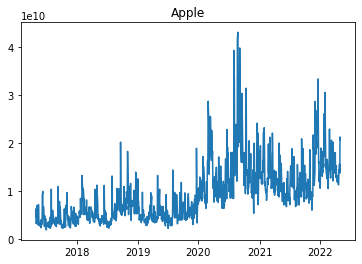

In [280]:
total_value = volume['AAPL'] * price['AAPL']
y = total_value.to_list()
x = volume.index.to_list()
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.title("Apple")
plt.show()

In [281]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [282]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [283]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [285]:
pd.value_counts(obj.values, sort=False)

c    3
a    3
d    1
b    2
dtype: int64

In [286]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [287]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [292]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
# 获取unique_vals中的索引在to_match中的位置
pd.Index(unique_vals).get_indexer(to_match).tolist()

[0, 2, 1, 1, 0, 2]

In [294]:
unique_vals.to_list()

['c', 'b', 'a']